## **Implementation of KNN Algorithm on Income Evaluation Data**

The data contains information about the income of some people. Along with the income information, the data has information on which the income depends on. 

Data source: https://www.kaggle.com/lodetomasi1995/income-classification

In [32]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [35]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

import pickle 


In [3]:
# Loading the dataset as df

df = pd.read_csv("gdrive/My Drive/income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Data Visualization**

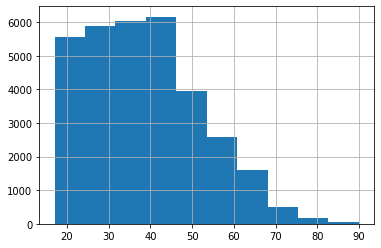

In [4]:
df['age'].hist()

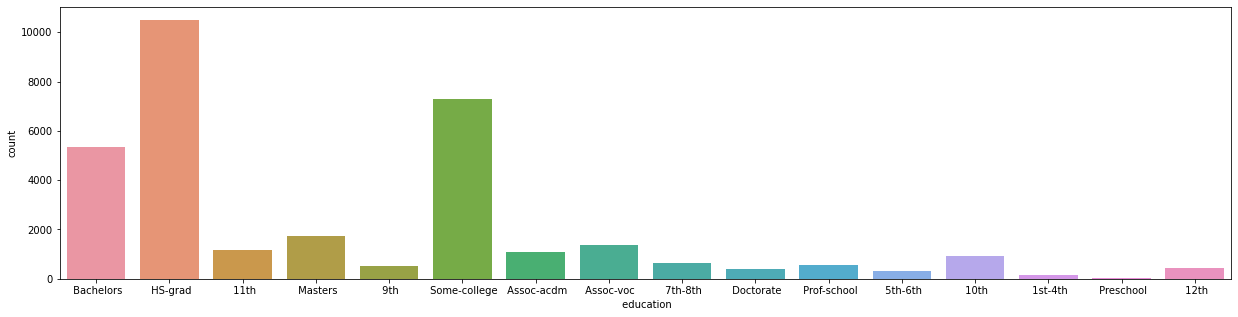

In [5]:
plt.figure(figsize = (21,5))
sns.countplot(x = df[' education'])

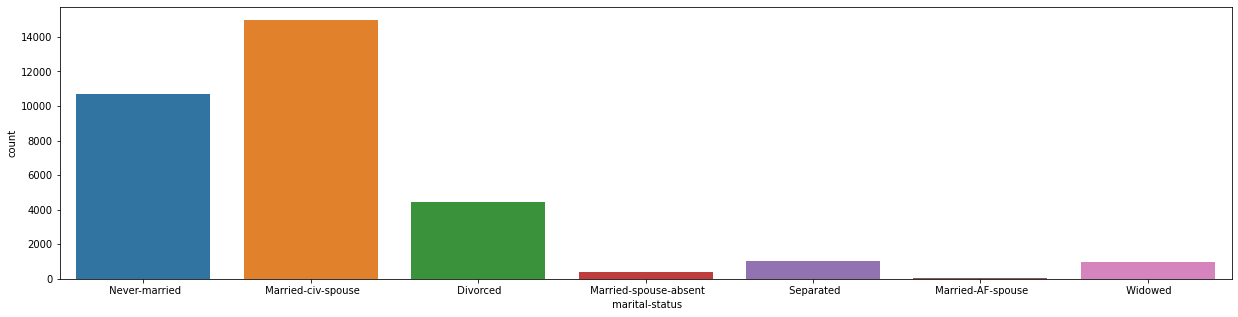

In [6]:
plt.figure(figsize = (21,5))
sns.countplot(x = df[' marital-status'])

**Data Filtering**

After the initial observations from the above two graphs, we observe that the education column has majority of the entries from three categories. These are 'Bachelors', 'HS-grad' and 'Some college'. Thus the data is filtered on this basis so that there will be a kind of uniform distribution with respect to this column. 

In [7]:
# Data Filtering
data = df[(df[' education-num'] == 9) | (df[' education-num'] == 10) | (df[' education-num'] == 13)]

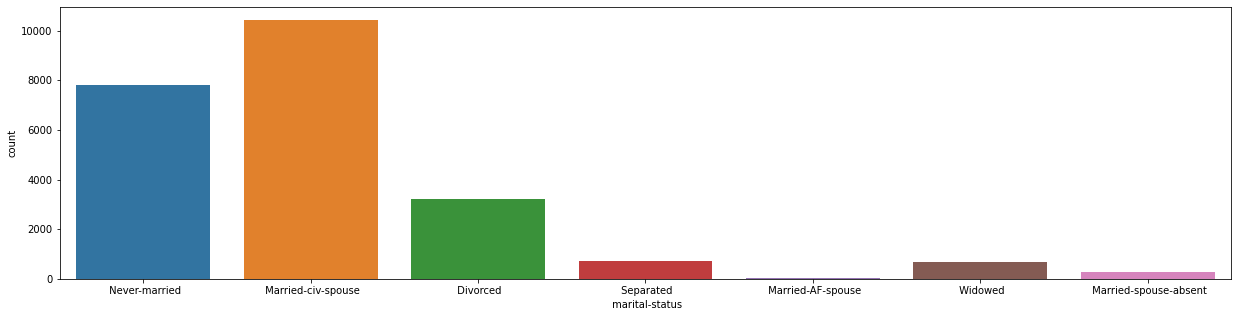

In [8]:
plt.figure(figsize = (21,5))
sns.countplot(x = data[' marital-status'])

In [9]:
data.shape

(23147, 15)

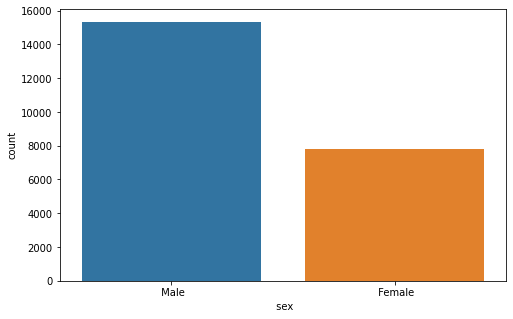

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(x = data[' sex'])

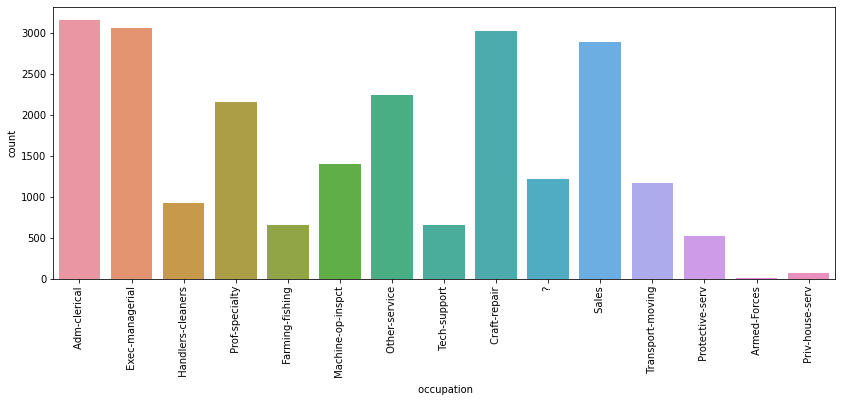

In [11]:
plt.figure(figsize = (14,5))
plt.xticks(rotation = 90)
sns.countplot(x = data[' occupation'])

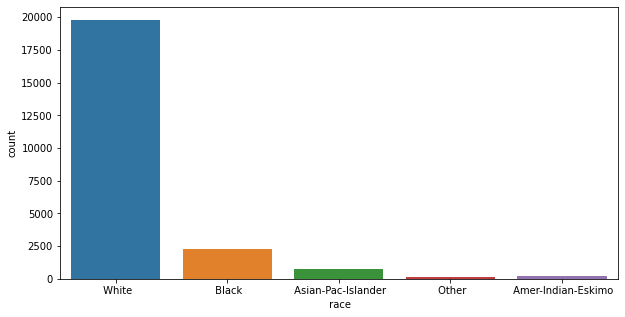

In [12]:
plt.figure(figsize = (10,5))
# plt.xticks(rotation = 90)
sns.countplot(x = data[' race'])

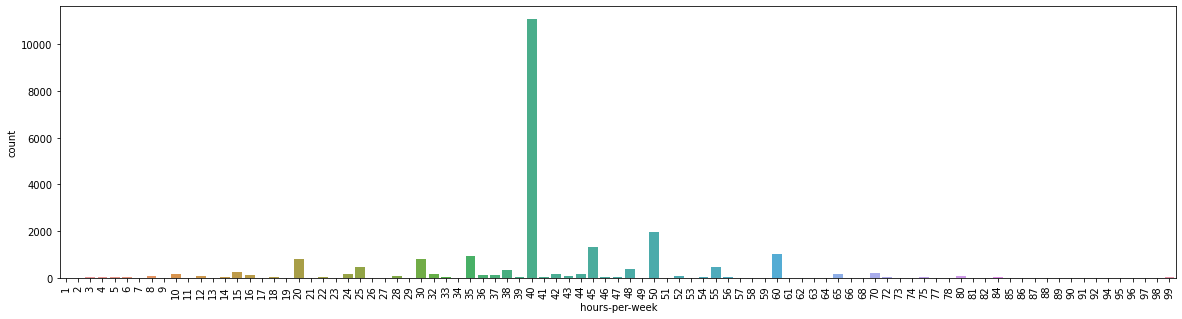

In [13]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
sns.countplot(x = data[' hours-per-week'])

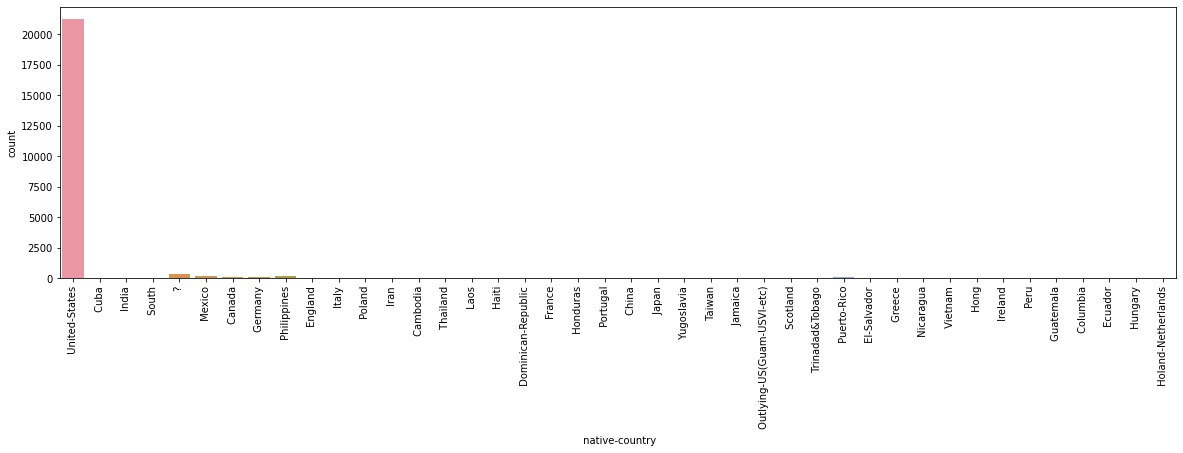

In [14]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
sns.countplot(x = data[' native-country'])

Here also we again filter the data after observing the countplot of column 'native-country' which has majority of the enteries for one specific country. 


In [15]:
# Data filtering
data = data[data[' native-country'] == ' United-States']

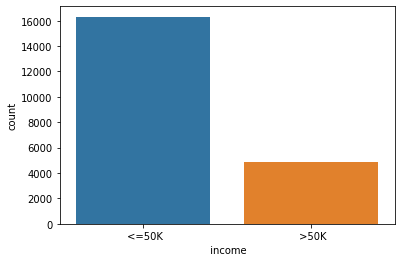

In [31]:
sns.countplot(x = data[' income'])

As seen from the above graph, we can see that the dataset is not balanced.

In [16]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### **IMPLEMENTATION OF THE KNN ALGORITHM**




We will be appliying label encoder on the columns that have non-numerical values and are selected as features. This will transform the non numeric categorical columns into numeric. 

In [17]:
# Encodong the data
from sklearn import preprocessing
# creating label encoder
le = preprocessing.LabelEncoder()


In [18]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [19]:
data['age'] = le.fit_transform(data['age'])
data[' workclass'] = le.fit_transform(data[' workclass'])
data[' education'] = le.fit_transform(data[' education'])
data[' marital-status'] = le.fit_transform(data[' marital-status'])
data[' occupation'] = le.fit_transform(data[' occupation'])
data[' relationship'] = le.fit_transform(data[' relationship'])
data[' race'] = le.fit_transform(data[' race'])
data[' sex'] = le.fit_transform(data[' sex'])
data[' hours-per-week'] = le.fit_transform(data[' hours-per-week'])
data[' native-country'] = le.fit_transform(data[' native-country'])

Checking the data after the encoding the columns.

In [20]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,77516,0,13,4,1,1,4,1,2174,0,38,0,<=50K
1,33,6,83311,0,13,2,4,0,4,1,0,0,12,0,<=50K
2,21,4,215646,1,9,0,6,1,4,1,0,0,38,0,<=50K
7,35,6,209642,1,9,2,4,0,4,1,0,0,43,0,>50K
9,25,4,159449,0,13,2,4,0,4,1,5178,0,38,0,>50K


In [21]:
X = np.array(data[['age', ' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' hours-per-week', ' native-country']])
y = np.array(data[' income'])

In [22]:
# Checking X and y shape
X.shape, y.shape

((21208, 10), (21208,))

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [24]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None )

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [25]:
# Check the accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.7947509036617948


In [30]:
c_matrix = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", c_matrix) 
print(classification_report(y_test, y_pred) )

Confusion Matrix : 
 [[4377  541]
 [ 765  680]]
              precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      4918
        >50K       0.56      0.47      0.51      1445

    accuracy                           0.79      6363
   macro avg       0.70      0.68      0.69      6363
weighted avg       0.78      0.79      0.79      6363



Now we try to observe if we can increase the accuracy by using hyper parameter tuning. This is done with the help of Grid Search CV. 

In [43]:
grid_params = {
    'n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23,25],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,      
    n_jobs = 2,   
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   30.6s finished


In [44]:
# Observing the best score
gs_results.best_score_

0.8065344253231519

In [45]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [46]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

In [53]:
# Create KNN Classifier with the best parameters
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [54]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.8073235895018073


In [55]:
c_matrix = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", c_matrix) 
print(classification_report(y_test, y_pred) )

Confusion Matrix : 
 [[4399  519]
 [ 707  738]]
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      4918
        >50K       0.59      0.51      0.55      1445

    accuracy                           0.81      6363
   macro avg       0.72      0.70      0.71      6363
weighted avg       0.80      0.81      0.80      6363



We can observe that the accuracy has increased by a very small margin by tuning the hyperparameters. 

**Saving the model**

We can save the model using Pickle. It is a very simple process which is shown below. This is done in two steps shown below. 


In [57]:
# Save the trained model as a pickle string. 
Knn_Model_For_Income = pickle.dumps(knn) 
  
# Load the pickled model 
knn_model = pickle.loads(Knn_Model_For_Income) 
  
# Use the loaded pickled model to make predictions 
knn_model.predict(X_test) 


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

The above output array is obtained by using the saved model. 